Epoch 1/10
422/422 [==============================] - 23s 53ms/step - loss: 0.6936 - accuracy: 0.7501 - val_loss: 0.4440 - val_accuracy: 0.8350
Epoch 2/10
422/422 [==============================] - 22s 52ms/step - loss: 0.4493 - accuracy: 0.8397 - val_loss: 0.3922 - val_accuracy: 0.8590
Epoch 3/10
422/422 [==============================] - 22s 53ms/step - loss: 0.4004 - accuracy: 0.8562 - val_loss: 0.3535 - val_accuracy: 0.8742
Epoch 4/10
422/422 [==============================] - 22s 52ms/step - loss: 0.3749 - accuracy: 0.8670 - val_loss: 0.3401 - val_accuracy: 0.8767
Epoch 5/10
422/422 [==============================] - 23s 54ms/step - loss: 0.3542 - accuracy: 0.8729 - val_loss: 0.3239 - val_accuracy: 0.8817
Epoch 6/10
422/422 [==============================] - 22s 53ms/step - loss: 0.3382 - accuracy: 0.8791 - val_loss: 0.3125 - val_accuracy: 0.8845
Epoch 7/10
422/422 [==============================] - 21s 50ms/step - loss: 0.3237 - accuracy: 0.8836 - val_loss: 0.2994 - val_accuracy:

<Figure size 640x480 with 0 Axes>

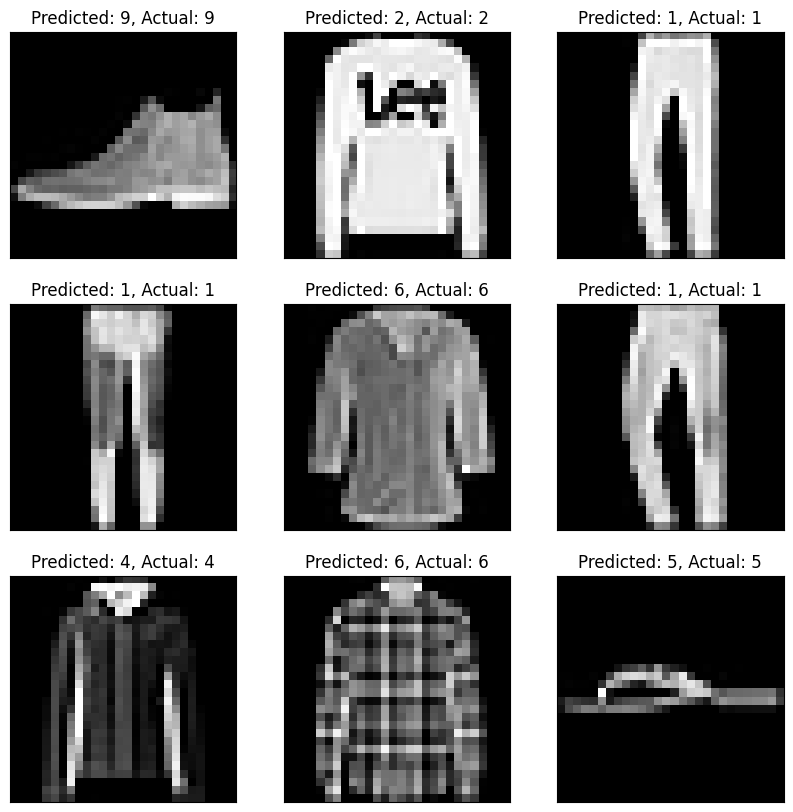

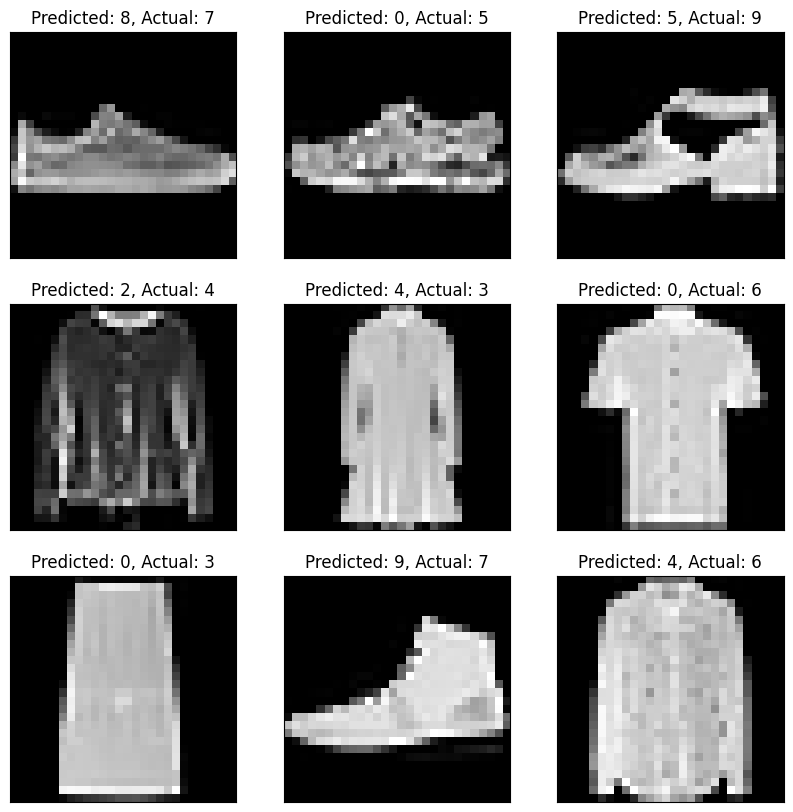

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Створення та компіляція моделі
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Навчання моделі
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.1)

# Оцінка точності моделі на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

# Збереження моделі
model.save("fashion_mnist_cnn.h5")

# Візуалізація результатів
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

correct = np.nonzero(predicted_classes == y_test)[0]
incorrect = np.nonzero(predicted_classes != y_test)[0]

plt.figure(figsize=(10, 10))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[correct].reshape(28, 28), cmap="gray", interpolation="none")
    plt.title(
        "Predicted: {}, Actual: {}".format(
            predicted_classes[correct], y_test[correct]
        )
    )
    plt.xticks([])
    plt.yticks([])

plt.figure(figsize=(10, 10))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[incorrect].reshape(28, 28), cmap="gray", interpolation="none")
    plt.title(
        "Predicted: {}, Actual: {}".format(
            predicted_classes[incorrect], y_test[incorrect]
        )
    )
    plt.xticks([])
    plt.yticks([])

plt.show()
